In [1]:
#import library
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#check use GPU or CPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
#load data
val_path="fruit-and-vegetable-classification/validation"
train_path="fruit-and-vegetable-classification/train"
test_path="fruit-and-vegetable-classification/test"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)

Found 3581 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [4]:
class_names = train_dataset.class_names
print(len(class_names))
print(class_names)

36
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [5]:
#call model .h5
model = tf.keras.models.load_model('Fruit_and_vegetable_classification.h5')


In [6]:
#kiểm tra model dựa trên tập test
loss, acc = model.evaluate(test_dataset, verbose=2)

print('Test loss:', loss)

print('Test accuracy:', acc)




12/12 - 6s - loss: 0.0836 - accuracy: 0.9749 - 6s/epoch - 510ms/step
Test loss: 0.08356770128011703
Test accuracy: 0.9749303460121155


In [9]:
#đưa ảnh bẩt kì vào model để nhận diện
from keras_preprocessing import image
def Predict_model(path, model):
  model = tf.keras.models.load_model(model)
  image_path=path
  img = image.load_img(image_path, target_size=(224,224,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  pred = model.predict(images, batch_size=32)
  label = np.argmax(pred, axis=1)
  
  print("Predicted: "+class_names[np.argmax(pred)])
  plt.imshow(img)
  plt.show()



1/1 [==============================] - 0s 125ms/step
Predicted: bell pepper


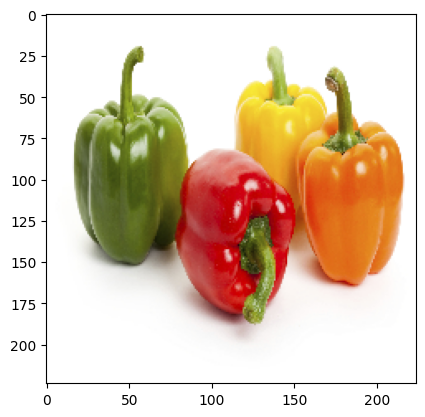

In [10]:
path = 'fruit-and-vegetable-classification/test/bell pepper/Image_9.jpg'
model = 'Fruit_and_vegetable_classification.h5'
Predict_model(path,model)